### Attempt at creating MLP for Intervention Prediction

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
df = pd.read_csv("last_one.csv")

In [64]:

df.drop('Unnamed: 0', axis = 1, inplace = True)

In [65]:
#one hot encode neighborhoods
test = pd.get_dummies(df,prefix=['ville'])

In [66]:
test.shape

(2663940, 50)

In [67]:
from sklearn import preprocessing as pp

df_y = test['#int'];
df_X = test.drop("#int", axis = 1);
df_X['#int'] = df_y
values = df_X.values
values = values.astype('float32')
# normalize features
scaler = pp.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
X, y = scaled[:, :-1], scaled[:, -1]

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import metrics, losses

In [71]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=49))
model.add(Dense(50))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics = [metrics.sparse_categorical_accuracy])

Train on 1784839 samples, validate on 879101 samples
Epoch 1/20
1784839/1784839 [==============================] - 31s 17us/step - loss: 2.2333e-04 - sparse_categorical_accuracy: 0.7032 - val_loss: 1.1962e-07 - val_sparse_categorical_accuracy: 0.7034
Epoch 2/20
1784839/1784839 [==============================] - 16s 9us/step - loss: 9.1499e-06 - sparse_categorical_accuracy: 0.7032 - val_loss: 1.1922e-07 - val_sparse_categorical_accuracy: 0.7034
Epoch 3/20
1784839/1784839 [==============================] - 17s 9us/step - loss: 9.1498e-06 - sparse_categorical_accuracy: 0.7032 - val_loss: 1.1921e-07 - val_sparse_categorical_accuracy: 0.7034
Epoch 4/20
1784839/1784839 [==============================] - 17s 10us/step - loss: 9.1498e-06 - sparse_categorical_accuracy: 0.7032 - val_loss: 1.1921e-07 - val_sparse_categorical_accuracy: 0.7034
Epoch 5/20
1784839/1784839 [==============================] - 17s 10us/step - loss: 9.1498e-06 - sparse_categorical_accuracy: 0.7032 - val_loss: 1.1921e-07 -

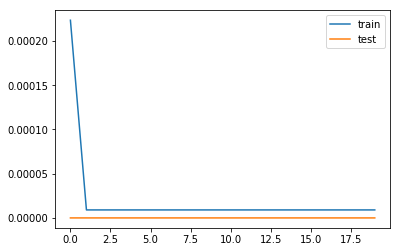

In [72]:
history = model.fit(X_train, y_train, epochs=20, batch_size=200, validation_data=(X_test, y_test),  verbose=1, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [74]:
1873489/df_y.shape[0]

0.7032774762194344

Unfortunately can see that the algorithm is only outputting Zero as the predictive quantity. If we only predict Zero interventions per hour we arrive at 70% accuracy, although this is NOT what we want. Seems to be little to no predictive power. 